lalalalal


Đang xử lý bộ dữ liệu: ../data/1_ThreeProvinces.csv
Số thành phố: 3
Đường đi tối ưu: [1, 3, 2, 1]
Độ dài đường đi tối ưu tìm được: 209.51
Thời gian chạy (s): 0.19


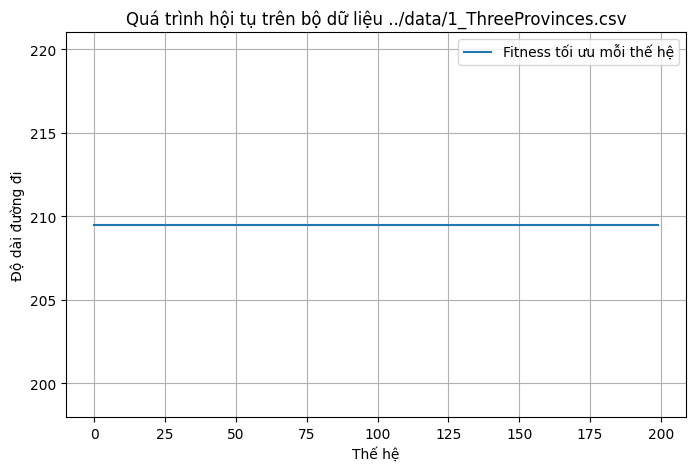

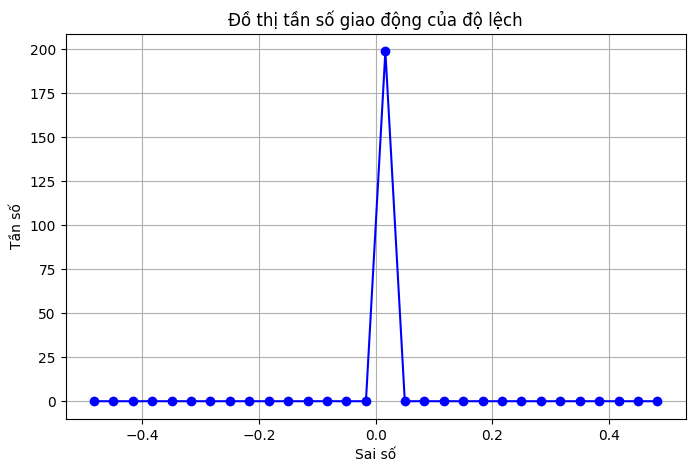

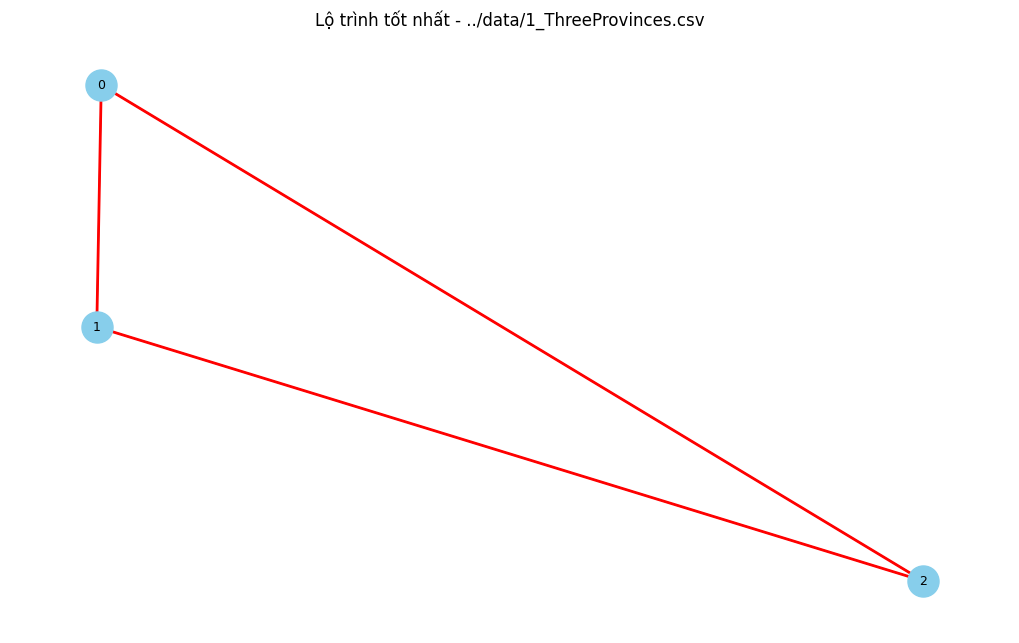

Đang xử lý bộ dữ liệu: ../data/2_SouthEast.csv
Số thành phố: 6
Đường đi tối ưu: [1, 6, 5, 3, 2, 4, 1]
Độ dài đường đi tối ưu tìm được: 426.02
Thời gian chạy (s): 0.20


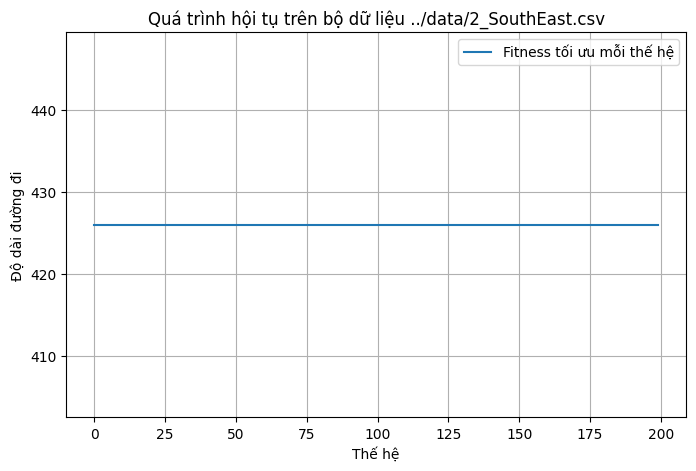

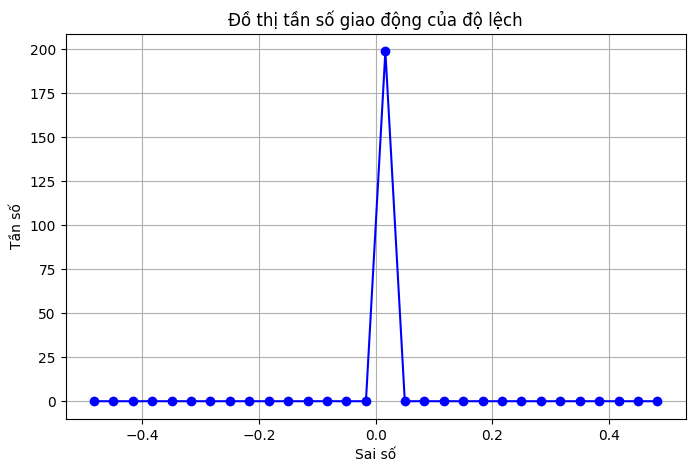

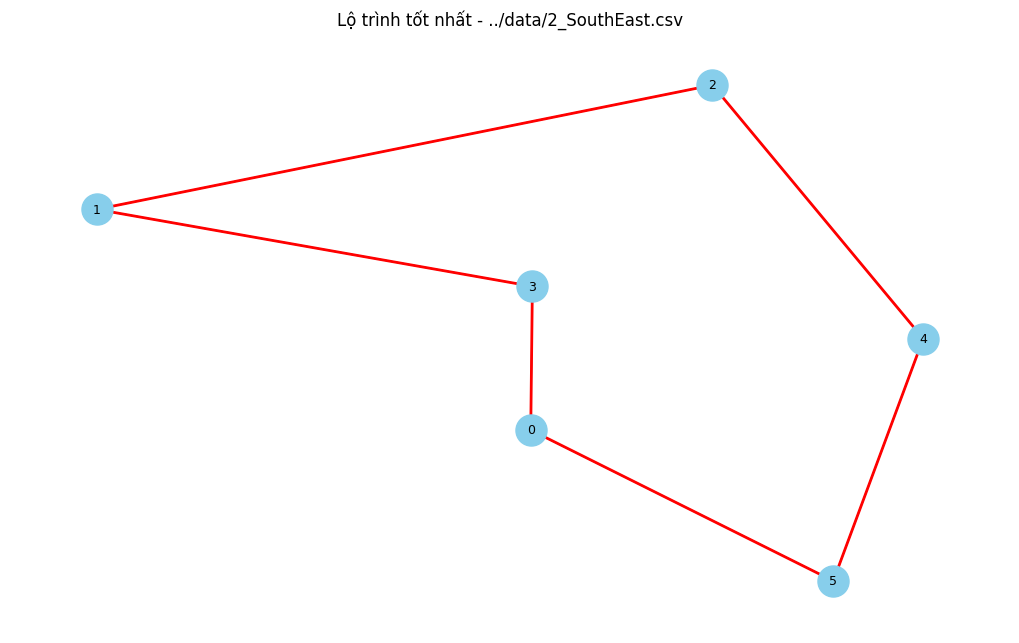

Đang xử lý bộ dữ liệu: ../data/3_MekongDelta.csv
Số thành phố: 13
Đường đi tối ưu: [1, 7, 8, 6, 5, 2, 3, 4, 10, 13, 12, 11, 9, 1]
Độ dài đường đi tối ưu tìm được: 650.14
Thời gian chạy (s): 0.34


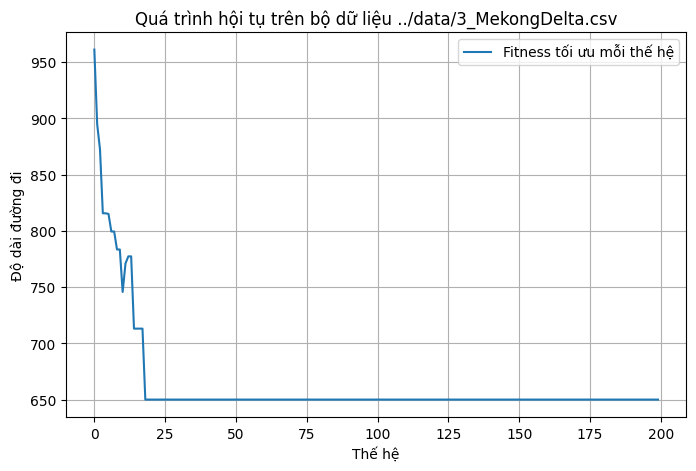

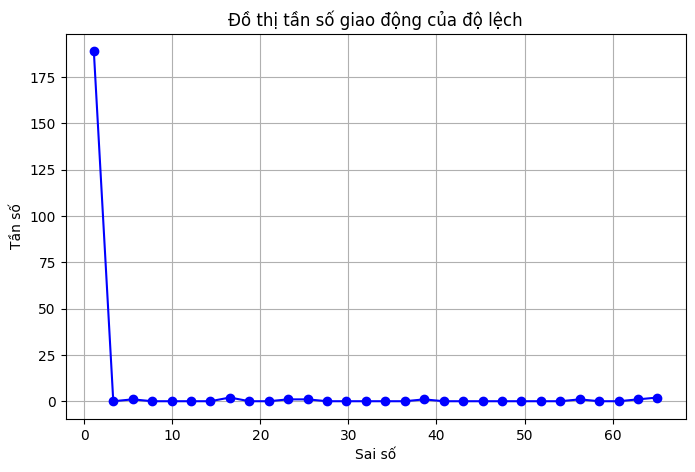

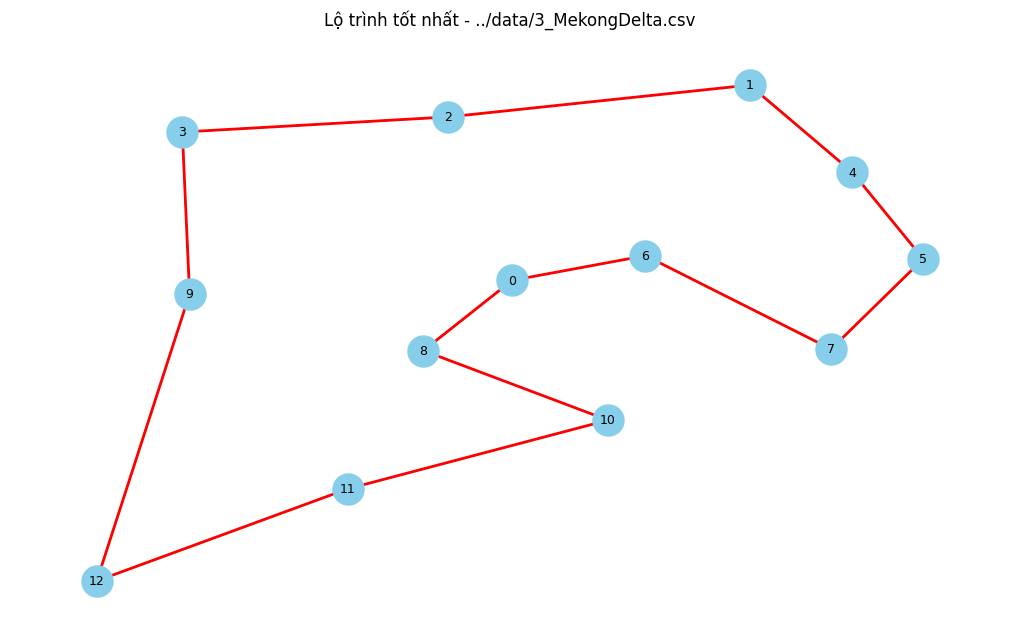

Đang xử lý bộ dữ liệu: ../data/4_SouthRegion.csv
Số thành phố: 17
Đường đi tối ưu: [1, 3, 2, 5, 4, 8, 14, 13, 11, 6, 7, 9, 12, 17, 15, 16, 10, 1]
Độ dài đường đi tối ưu tìm được: 1260.01
Thời gian chạy (s): 0.35


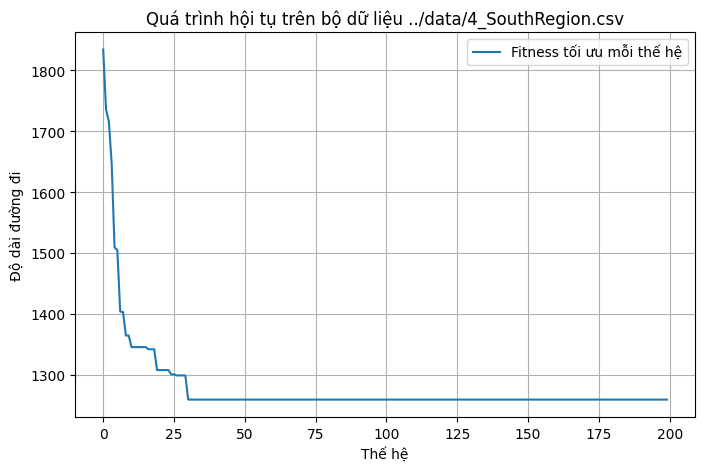

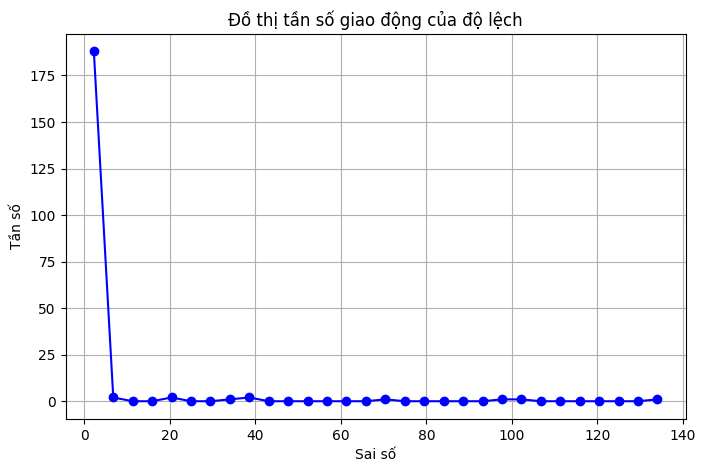

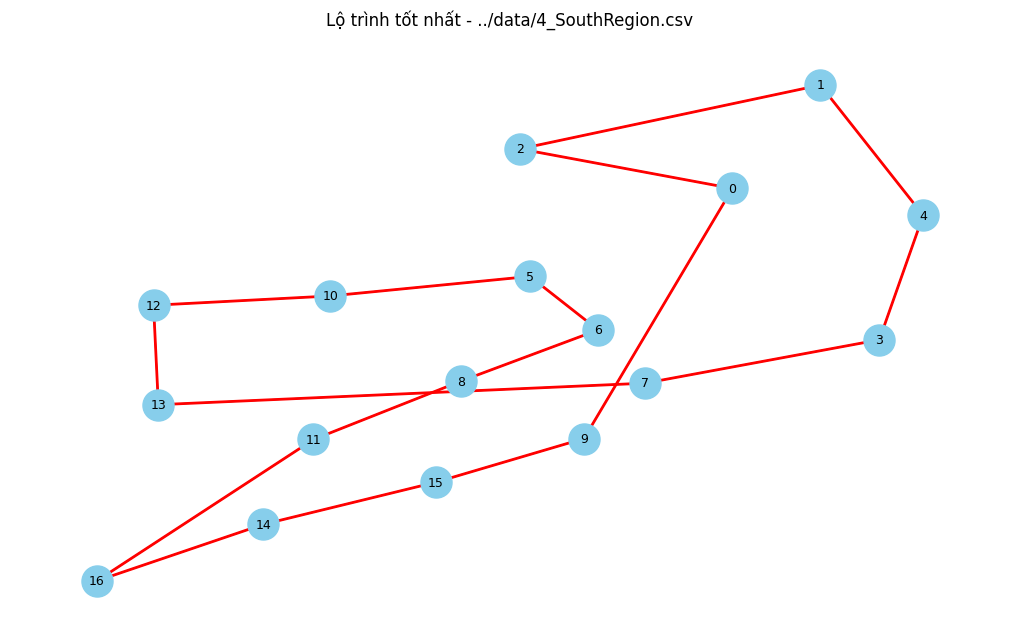

Đang xử lý bộ dữ liệu: ../data/5_CentralRegion.csv
Số thành phố: 19
Đường đi tối ưu: [1, 2, 3, 4, 5, 6, 19, 7, 14, 8, 9, 10, 11, 12, 13, 18, 17, 16, 15, 1]
Độ dài đường đi tối ưu tìm được: 2392.11
Thời gian chạy (s): 0.43


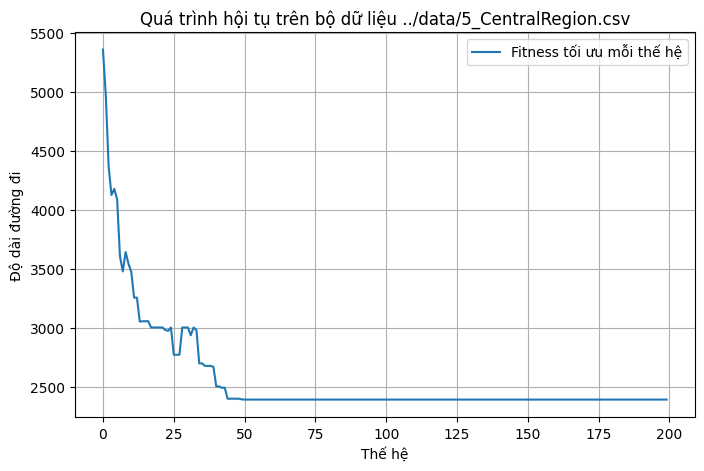

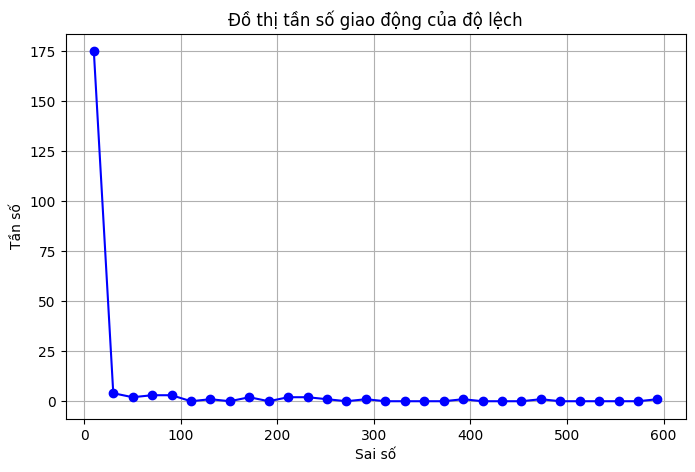

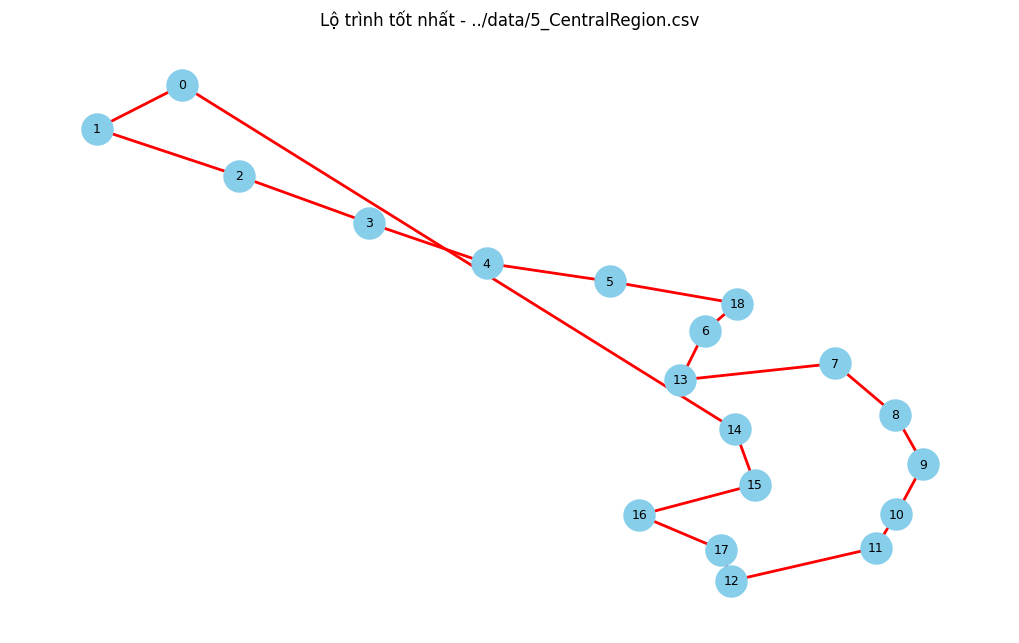

Đang xử lý bộ dữ liệu: ../data/6_NorthRegion.csv
Số thành phố: 25
Đường đi tối ưu: [1, 2, 3, 5, 12, 10, 11, 13, 14, 7, 25, 15, 17, 21, 16, 6, 18, 19, 23, 22, 24, 20, 9, 8, 4, 1]
Độ dài đường đi tối ưu tìm được: 1779.67
Thời gian chạy (s): 0.51


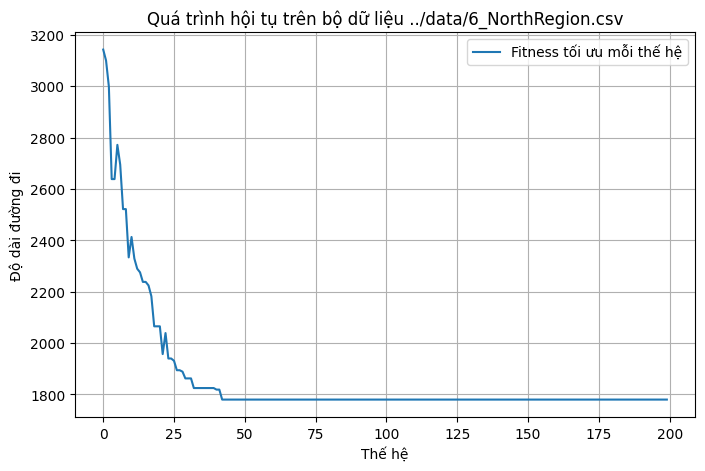

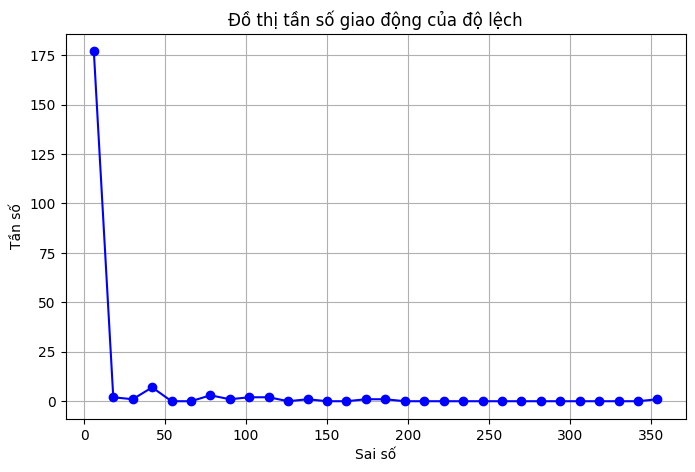

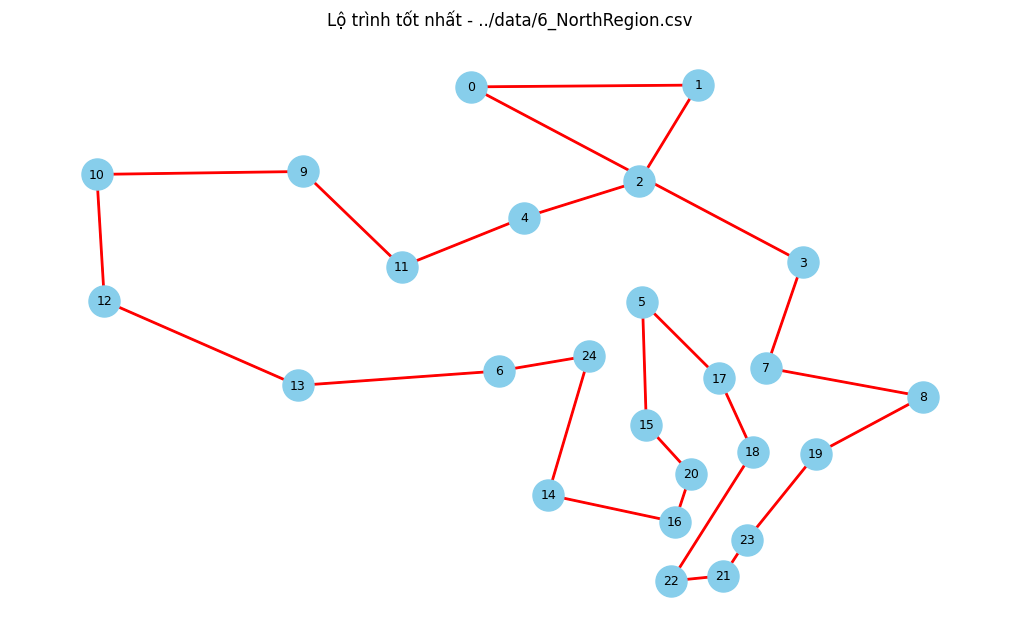

Đang xử lý bộ dữ liệu: ../data/7_SouthandCentral.csv
Số thành phố: 38
Đường đi tối ưu: [1, 2, 3, 5, 4, 6, 19, 7, 8, 14, 15, 9, 25, 26, 28, 29, 27, 37, 23, 13, 18, 17, 16, 10, 11, 12, 24, 21, 20, 22, 30, 32, 38, 35, 34, 31, 36, 33, 1]
Độ dài đường đi tối ưu tìm được: 4803.95
Thời gian chạy (s): 0.83


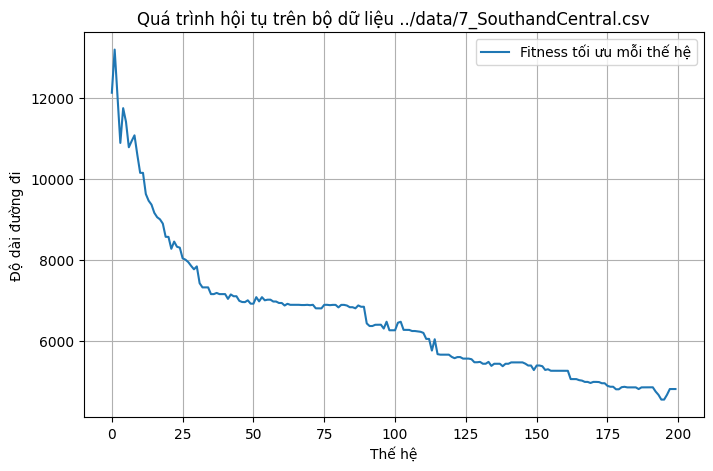

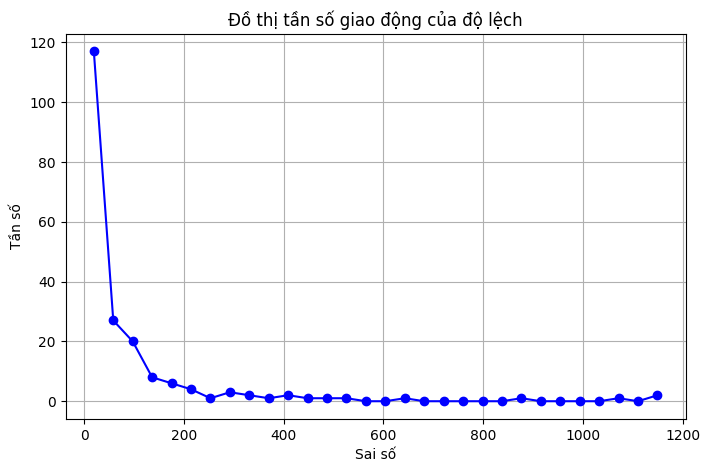

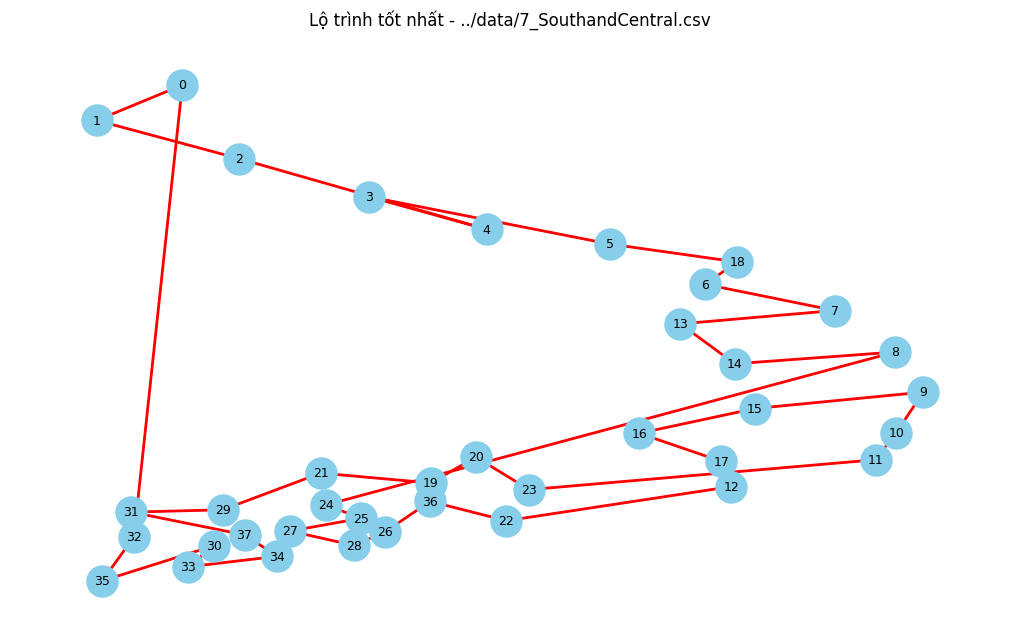

Đang xử lý bộ dữ liệu: ../data/8_VietNam.csv
Số thành phố: 63
Đường đi tối ưu: [1, 58, 50, 38, 63, 44, 3, 55, 54, 56, 24, 26, 49, 23, 46, 57, 21, 17, 10, 36, 11, 32, 16, 47, 40, 42, 31, 30, 6, 27, 41, 35, 18, 52, 22, 4, 60, 14, 37, 62, 25, 53, 2, 9, 34, 8, 43, 7, 5, 28, 61, 51, 19, 45, 48, 15, 39, 29, 59, 33, 12, 13, 20, 1]
Độ dài đường đi tối ưu tìm được: 11756.51
Thời gian chạy (s): 1.44


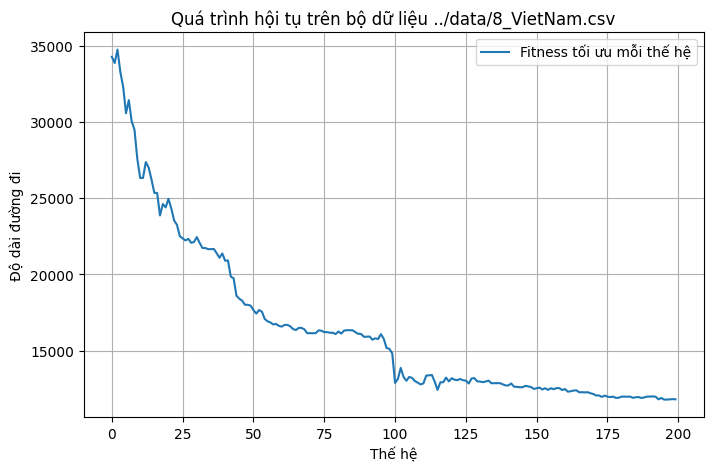

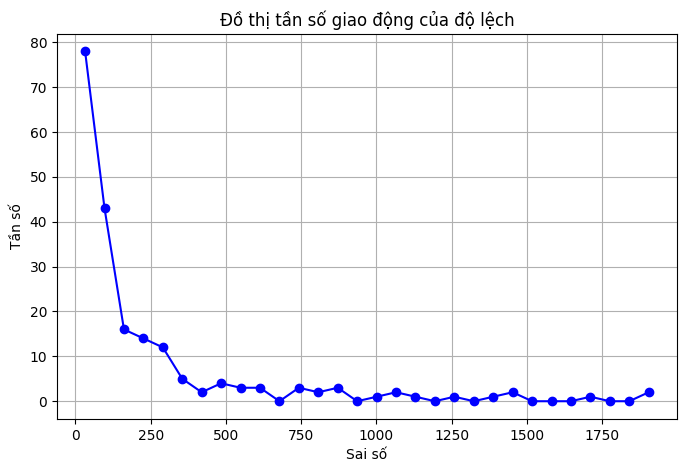

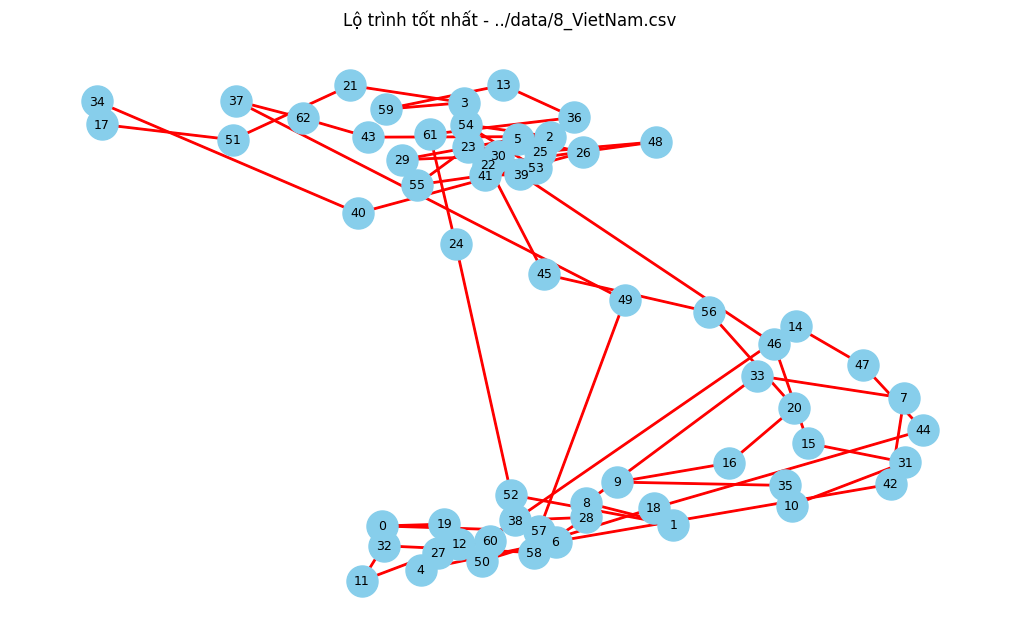


--- Tổng kết kết quả đánh giá ---
../data/1_ThreeProvinces.csv - Số thành phố: 3 - Độ dài tối ưu: 209.51 - Thời gian: 0.19s
../data/2_SouthEast.csv - Số thành phố: 6 - Độ dài tối ưu: 426.02 - Thời gian: 0.20s
../data/3_MekongDelta.csv - Số thành phố: 13 - Độ dài tối ưu: 650.14 - Thời gian: 0.34s
../data/4_SouthRegion.csv - Số thành phố: 17 - Độ dài tối ưu: 1260.01 - Thời gian: 0.35s
../data/5_CentralRegion.csv - Số thành phố: 19 - Độ dài tối ưu: 2392.11 - Thời gian: 0.43s
../data/6_NorthRegion.csv - Số thành phố: 25 - Độ dài tối ưu: 1779.67 - Thời gian: 0.51s
../data/7_SouthandCentral.csv - Số thành phố: 38 - Độ dài tối ưu: 4803.95 - Thời gian: 0.83s
../data/8_VietNam.csv - Số thành phố: 63 - Độ dài tối ưu: 11756.51 - Thời gian: 1.44s


In [2]:
import pandas as pd 
import time
import math
import numpy as np
import os
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

def load_locations_from_csv(file_path):
    """
    Giả định file csv có cột 'lat' và 'lon' hoặc tương tự.
    """
    df = pd.read_csv(file_path)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    elif 'latitude' in df.columns and 'longitude' in df.columns:
        locations = list(zip(df['latitude'], df['longitude']))
    else:
        raise ValueError("CSV phải có cột 'lat' và 'lon' hoặc 'latitude' và 'longitude'")
    return locations

def evaluate_ga_on_dataset(file_path,
                           population_size=100,
                           generations=200,
                           mutation_rate=0.01,
                           mutation_algorithm='swap',
                           crossover_algorithm='single_point',
                           selection_algorithm='tournament'):
    print(f"Đang xử lý bộ dữ liệu: {file_path}")

    # Load tọa độ
    locations = load_locations_from_csv(file_path)
    n_cities = len(locations)
    print(f"Số thành phố: {n_cities}")

    # Tính ma trận khoảng cách
    distance_matrix = compute_distance_matrix(locations)

    # Chạy GA
    start_time = time.time()
    distance, route, fitness_history = solve(
        problem=distance_matrix,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Đường đi tối ưu:", route)
    print(f"Độ dài đường đi tối ưu tìm được: {distance:.2f}")
    print(f"Thời gian chạy (s): {elapsed_time:.2f}")

    # Vẽ đồ thị quá trình hội tụ
    plt.figure(figsize=(8, 5))
    plt.plot(fitness_history, label='Fitness tối ưu mỗi thế hệ')
    plt.xlabel('Thế hệ')
    plt.ylabel('Độ dài đường đi')
    plt.title(f'Quá trình hội tụ trên bộ dữ liệu {file_path}')
    plt.legend()
    plt.grid(True)
    plt.show()

    fitness_diff = np.abs(np.diff(fitness_history))
    # Tính tần số xuất hiện các giá trị độ lệch bằng np.histogram
    counts, bin_edges = np.histogram(fitness_diff, bins=30)

# Tính giá trị trung bình mỗi bin để làm trục X
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(8, 5))
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='blue')
    plt.xlabel('Sai số')
    plt.ylabel('Tần số')
    plt.title('Đồ thị tần số giao động của độ lệch')
    plt.grid(True)
    plt.show()


    # Hiển thị lộ trình trên bản đồ
    visualize(locations, [city-1 for city in route], title=f'Lộ trình tốt nhất - {file_path}')

    return {
        'file': file_path,
        'num_cities': n_cities,
        'best_distance': distance,
        'time_sec': elapsed_time,
        'fitness_history': fitness_history,
        'best_route': route
    }

if __name__ == "__main__":
    # Danh sách các file csv cần đánh giá (thay thế bằng đường dẫn file thực tế)
    datasets = [
        "../data/1_ThreeProvinces.csv",
        "../data/2_SouthEast.csv",
        "../data/3_MekongDelta.csv",
        "../data/4_SouthRegion.csv",
        "../data/5_CentralRegion.csv",
        "../data/6_NorthRegion.csv",
        "../data/7_SouthandCentral.csv",
        "../data/8_VietNam.csv"
        
        # Thêm các file khác nếu có
    ]

    results = []
    for datafile in datasets:
        try:
            res = evaluate_ga_on_dataset(datafile)
            results.append(res)
        except Exception as e:
            print(f"Lỗi khi xử lý {datafile}: {e}")

    # In tóm tắt kết quả
    print("\n--- Tổng kết kết quả đánh giá ---")
    for r in results:
        print(f"{r['file']} - Số thành phố: {r['num_cities']} - Độ dài tối ưu: {r['best_distance']:.2f} - Thời gian: {r['time_sec']:.2f}s")


## NHẬN XÉT

**Đồ thị quá trình hội tụ**
- Với các bộ dữ liệu nhỏ, đường fitness thường ổn định sớm, biểu hiện bằng một đường ngang kéo dài – cho thấy thuật toán không còn cải tiến thêm và có thể đã đạt lời giải tối ưu ngay từ đầu.
- Với dữ liệu vừa và lớn, fitness thường giảm nhanh trong những thế hệ đầu, sau đó chậm dần và ổn định – cho thấy sự hội tụ dần về lời giải tốt hơn, và quá trình tìm kiếm vẫn còn đang khai thác.
- Một số đồ thị có nhiều bước nhảy nhỏ (fitness dao động) cho thấy thuật toán vẫn còn khả năng khám phá và chưa rơi vào cực trị cục bộ quá sớm.

**Đồ thị tần số dao động của độ lệch**
- Với các bộ dữ liệu nhỏ, độ lệch hầu như tập trung tại 0, tức là toàn bộ quần thể hội tụ tuyệt đối, không có biến dị đáng kể.
- Với dữ liệu trung bình, có một số sai số nhỏ xuất hiện, cho thấy sự đa dạng quần thể được duy trì ở mức tối thiểu – vừa đủ để tiếp tục tìm kiếm quanh nghiệm tốt.
- Với dữ liệu lớn, độ lệch rải rộng hơn, thậm chí có sai số rất lớn, chứng tỏ thuật toán vẫn đang khám phá mạnh, có thể do không gian tìm kiếm phức tạp, dễ mắc kẹt và đòi hỏi sự đa dạng cao hơn.

## KẾT LUẬN

- **Nhóm nhỏ (3, 6 điểm)**
    - Fitness giữ nguyên → hội tụ ngay từ đầu.
    - Dao động lệch = 0 → không có tiến hóa.
    - Kết luận: Bài toán đơn giản, GA đạt kết quả nhanh. Tuy nhiên, khó đánh giá khả năng tối ưu thực sự của thuật toán.

- **Nhóm trung bình (13, 17, 19, 25 điểm)**
    - Fitness giảm nhanh, ổn định sau ~50 thế hệ.
    - Dao động nhỏ → có tiến hóa, duy trì đa dạng ở mức vừa.
    - Kết luận: GA phù hợp, hoạt động ổn định. Có thể cải thiện thêm bằng cách tinh chỉnh nhẹ tham số.

- **Nhóm lớn (38, 63 điểm)**
    - Fitness giảm chậm, nhiều bước nhảy → hội tụ khó khăn.
    - Dao động rộng → không gian tìm kiếm phức tạp, cần khám phá sâu.
    - Kết luận: Cấu hình mặc định chưa tối ưu. Nên tăng quần thể, dùng crossover/đột biến mạnh hơn hoặc kết hợp heuristic.

